In [1]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sys.path.append(os.path.abspath('..'))
from src.data_loader import load_data
from src.config import (
    RANDOM_SEED, FIGURES_DIR, RESULTS_DIR,
    NUMERICAL_FEATURES, CATEGORICAL_FEATURES, ORDINAL_FEATURES,
    TARGET_FEATURE, ALL_FEATURES
)

In [7]:
np.random.seed(RANDOM_SEED)

# vis config
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.1)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
train_df, test_df = load_data()

Loading training data from /Users/kryspin/personal/playground/recruitment/challengING_DS/ing_task/data/train.parquet
Loading test data from /Users/kryspin/personal/playground/recruitment/challengING_DS/ing_task/data/test.parquet
Train shape: (20000, 11)
Test shape: (5000, 11)


In [8]:
print(">>> TRAIN")
print(train_df.info())
print(f"Shape: {train_df.shape}")
print(f"Default rate: {train_df['Default'].value_counts(normalize=True)}")
print(f"Default rate in train: {train_df['Default'].mean():.2%}")
print(f"Missing values:\n{train_df.isnull().sum()}")

print("\n>>> TEST ")
print(test_df.info())
print(f"Shape: {test_df.shape}")
print(f"Has Default? {'Default' in test_df.columns}")
if 'Default' in test_df.columns:
    print(f"Default rate: {test_df['Default'].value_counts(normalize=True)}")
    print(f"Default rate in test: {test_df['Default'].mean():.2%}")

>>> TRAIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              20000 non-null  int64  
 1   Income           20000 non-null  float64
 2   CreditScore      17617 non-null  float64
 3   LoanAmount       20000 non-null  float64
 4   EmploymentYears  20000 non-null  int64  
 5   NumDependents    20000 non-null  int64  
 6   DebtToIncome     20000 non-null  float64
 7   EducationLevel   20000 non-null  int64  
 8   FavoriteColor    20000 non-null  object 
 9   Hobby            20000 non-null  object 
 10  Default          20000 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ MB
None
Shape: (20000, 11)
Default rate: Default
0    0.65685
1    0.34315
Name: proportion, dtype: float64
Default rate in train: 34.31%
Missing values:
Age                   0
Income                0
CreditScore        238

In [15]:
print("=" * 80)
print("DATA STRUCTURE")
print("=" * 80)

print(f"Total samples: {train_df.shape[0] + test_df.shape[0]:,}")

# verify both datasets have the same columns
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

assert(train_cols == test_cols)

print("\nColumn details:")
print(train_df.dtypes)

print(f"\nMemory usage:")
print(f"Training set: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Test set: {test_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATA STRUCTURE
Total samples: 25,000

Column details:
Age                  int64
Income             float64
CreditScore        float64
LoanAmount         float64
EmploymentYears      int64
NumDependents        int64
DebtToIncome       float64
EducationLevel       int64
FavoriteColor       object
Hobby               object
Default              int64
dtype: object

Memory usage:
Training set: 3.46 MB
Test set: 0.87 MB


In [16]:
print("=" * 80)
print("SAMPLE DATA")
print("=" * 80)

print("\nFirst 5 rows of training data:")
display(train_df.head())

print("\nFirst 5 rows of test data:")
display(test_df.head())

SAMPLE DATA

First 5 rows of training data:


,Age,Income,CreditScore,LoanAmount,EmploymentYears,NumDependents,DebtToIncome,EducationLevel,FavoriteColor,Hobby,Default
0,59,16785.977212,604.0,19416.230574,3,2,0.912395,3,Green,Traveling,0
1,49,62263.017648,613.0,16902.153253,33,2,0.455917,1,Blue,Traveling,0
2,35,62414.862646,NaN,21639.847552,1,1,0.817570,3,Blue,Traveling,0
3,63,62653.254368,363.0,17216.445061,3,0,0.519046,3,Green,Reading,1
4,28,54601.849437,607.0,22955.590991,22,4,0.197581,1,Yellow,Reading,0



First 5 rows of test data:


,Age,Income,CreditScore,LoanAmount,EmploymentYears,NumDependents,DebtToIncome,EducationLevel,FavoriteColor,Hobby,Default
20000,65,46268.170006,799.0,21006.486795,28,2,0.408134,4,Yellow,Sports,0
20001,60,53019.204347,532.0,16096.908958,13,0,0.689294,1,Blue,Sports,0
20002,68,36639.270263,490.0,21399.505528,18,0,0.440931,3,Blue,Reading,1
20003,44,32326.717615,726.0,23690.410875,6,0,0.981147,4,Red,Reading,0
20004,49,50226.966160,798.0,21018.127774,24,4,0.796241,1,Red,Sports,0


In [19]:
print("=" * 80)
print("DATA TYPE VALIDATION")
print("=" * 80)

print("\nExpected numerical features:")
for feat in NUMERICAL_FEATURES:
    dtype = train_df[feat].dtype
    print(f"  {feat}: {dtype}", end="")
    if dtype in ['int64', 'float64']:
        print(" OK")
    else:
        print(f" !! (expected numeric, got {dtype})")

print("\nExpected categorical features:")
for feat in CATEGORICAL_FEATURES:
    dtype = train_df[feat].dtype
    print(f"  {feat}: {dtype}", end="")
    if dtype in ['object', 'category']:
        print(" OK")
    else:
        print(f" !! (expected categorical, got {dtype})")

print("\nOrdinal feature:")
for feat in ORDINAL_FEATURES:
    dtype = train_df[feat].dtype
    print(f"  {feat}: {dtype}", end="")
    if dtype == 'int64':
        print(" OK")
    else:
        print(f" !! (expected int64, got {dtype})")

print("\nTarget variable:")
dtype = train_df[TARGET_FEATURE].dtype
print(f"  {TARGET_FEATURE}: {dtype}", end="")
if dtype in ['int64', 'int32']:
    print(" OK")
else:
    print(f" !! (expected int, got {dtype})")

DATA TYPE VALIDATION

Expected numerical features:
  Age: int64 OK
  Income: float64 OK
  CreditScore: float64 OK
  LoanAmount: float64 OK
  EmploymentYears: int64 OK
  NumDependents: int64 OK
  DebtToIncome: float64 OK

Expected categorical features:
  FavoriteColor: object OK
  Hobby: object OK

Ordinal feature:
  EducationLevel: int64 OK

Target variable:
  Default: int64 OK


TARGET VARIABLE DISTRIBUTION

Training set:
  Class 0 (Solvent): 13,137 (65.69%)
  Class 1 (Default): 6,863 (34.31%)

Test set:
  Class 0 (Solvent): 3,240 (64.80%)
  Class 1 (Default): 1,760 (35.20%)

Difference in default rate: 0.88 percentage points


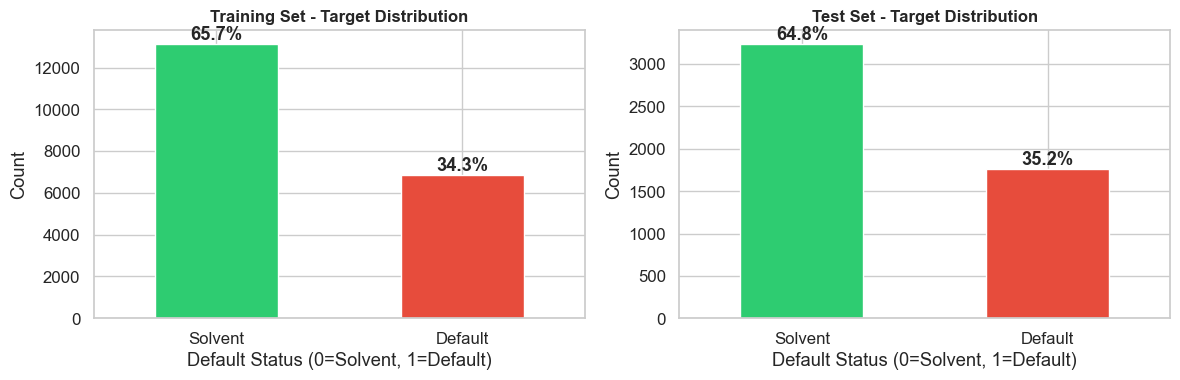


Figure saved to /Users/kryspin/personal/playground/recruitment/challengING_DS/ing_task/output/figures/01_target_distribution.png


In [26]:
print("=" * 80)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 80)

# calc distributions for both sets
train_target_dist = train_df[TARGET_FEATURE].value_counts().sort_index()
test_target_dist = test_df[TARGET_FEATURE].value_counts().sort_index()

train_target_pct = train_df[TARGET_FEATURE].value_counts(normalize=True).sort_index() * 100
test_target_pct = test_df[TARGET_FEATURE].value_counts(normalize=True).sort_index() * 100

print("\nTraining set:")
print(f"  Class 0 (Solvent): {train_target_dist[0]:,} ({train_target_pct[0]:.2f}%)")
print(f"  Class 1 (Default): {train_target_dist[1]:,} ({train_target_pct[1]:.2f}%)")

print("\nTest set:")
print(f"  Class 0 (Solvent): {test_target_dist[0]:,} ({test_target_pct[0]:.2f}%)")
print(f"  Class 1 (Default): {test_target_dist[1]:,} ({test_target_pct[1]:.2f}%)")

# check if dists are similar (proper train/test split)
diff = abs(train_target_pct[1] - test_target_pct[1])
print(f"\nDifference in default rate: {diff:.2f} percentage points")

# Visualize the distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Training set distribution
train_target_dist.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Training Set - Target Distribution', fontsize=12, fontweight='bold')
ax1.set_xlabel('Default Status (0=Solvent, 1=Default)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Solvent', 'Default'], rotation=0)
for i, v in enumerate(train_target_dist):
    ax1.text(i, v + 200, f'{train_target_pct[i]:.1f}%', ha='center', fontweight='bold')

# Test set distribution
test_target_dist.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c'])
ax2.set_title('Test Set - Target Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Default Status (0=Solvent, 1=Default)')
ax2.set_ylabel('Count')
ax2.set_xticklabels(['Solvent', 'Default'], rotation=0)
for i, v in enumerate(test_target_dist):
    ax2.text(i, v + 50, f'{test_target_pct[i]:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig(FIGURES_DIR / '01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nFigure saved to {FIGURES_DIR / '01_target_distribution.png'}")